In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:08<00:00, 102MB/s]
100% 1.06G/1.06G [00:08<00:00, 132MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128,kernel_size=(3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
histpry = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 78ms/step - accuracy: 0.5813 - loss: 0.6748 - val_accuracy: 0.7294 - val_loss: 0.5397
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.7495 - loss: 0.5092 - val_accuracy: 0.7932 - val_loss: 0.4396
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.8194 - loss: 0.4003 - val_accuracy: 0.7802 - val_loss: 0.4610
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 75ms/step - accuracy: 0.8665 - loss: 0.3031 - val_accuracy: 0.7854 - val_loss: 0.4936
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.9239 - loss: 0.1835 - val_accuracy: 0.7924 - val_loss: 0.6042
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9571 - loss: 0.1116 - val_accuracy: 0.7842 - val_loss: 0.8068
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 90s 90ms/step - accuracy: 0.9759 - loss: 0.0659 - val_accuracy: 0.7794 - val_loss: 1.0618
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 84ms/step - accuracy: 0.9825 - loss: 0.0505 - 

In [12]:
import matplotlib.pyplot as plt

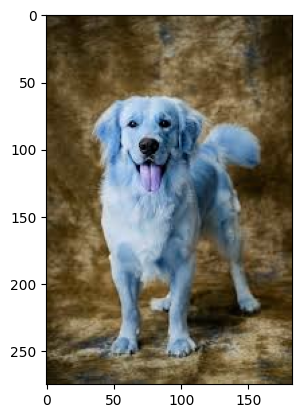

In [13]:
import cv2
test_img = cv2.imread('/content/dog.jpeg')
plt.imshow(test_img)

In [17]:
test_img.shape

(275, 183, 3)

In [18]:
test_img = cv2.resize(test_img,(256,256))

In [19]:
test_input = test_img.reshape(1, 256, 256, 3)
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step


array([[1.]], dtype=float32)